In [1]:
from model import Model
import numpy as np
from torch import nn
from dataset import CustomDataset
from torch.utils.data import random_split, DataLoader
import torch

model = None

In [2]:
dataset = CustomDataset()

train_set, val_set, test_set = random_split(dataset, (0.6, 0.2, 0.2))
train_loader = DataLoader(train_set, batch_size=4, shuffle=True)
val_loader = DataLoader(val_set, batch_size=64)
test_loader = DataLoader(test_set, batch_size=64)
len(train_set), len(val_set), len(test_set)

(57, 19, 19)

In [3]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [4]:
reload_model = False

if not model or reload_model:
    print("Model {}loaded".format("re" if reload_model and model else ""))
    model     = Model()
    loss_fn   = nn.MSELoss()

model

Model loaded


Model(
  (conv0_0): Conv2d(3, 5, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (conv0_1): Conv2d(5, 12, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv0_2): Conv2d(12, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv0_3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv0_4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv0_5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv0_6): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv0_7): Conv2d(128, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (conv0_8): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv0_9): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_0): Conv2d(3, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (conv1_1): Conv2d(16, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (conv1_2): Conv2d(16, 32, kernel_size=(7, 7)

In [ ]:
from tqdm.auto import tqdm
from copy import deepcopy
EPOCHS  = 250
lr = 0.001

optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss_list     = np.zeros((EPOCHS,))
val_loss      = np.ones((EPOCHS,)) * 1000
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm(range(EPOCHS)):
    for X, Y in train_loader:
        optimizer.zero_grad()
        y_pred = model(X)
        loss = loss_fn(y_pred, Y)
        loss.backward()
        optimizer.step()
        loss_list[epoch] += loss.item()
    loss_list[epoch] /= len(train_set)

    with torch.no_grad():
        val_loss[epoch] = 0
        for X, Y in val_loader:
            y_pred = model(X)
            loss = loss_fn(y_pred, Y)
            val_loss[epoch] += loss.item()
            
        val_loss[epoch] /= len(val_set)
        if val_loss[epoch] == min(val_loss):
            best_model = deepcopy(model)
    
    if epoch > 0:
        fig, (ax1) = plt.subplots(1, figsize=(12, 3), sharex=True)

        ax1.plot(loss_list[:epoch+1])
        ax1.plot(val_loss[:epoch+1])
        ax1.set_ylabel("Loss")
        ax1.set_xlabel("epochs")
        plt.show()

model = best_model

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 9), sharex=True)

ax1.plot(loss_list)
ax1.set_ylabel("Train loss")
ax2.plot(val_loss)
ax2.set_ylabel("Valid loss")
ax2.set_xlabel("epochs")
plt.show()

In [23]:
model = best_model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


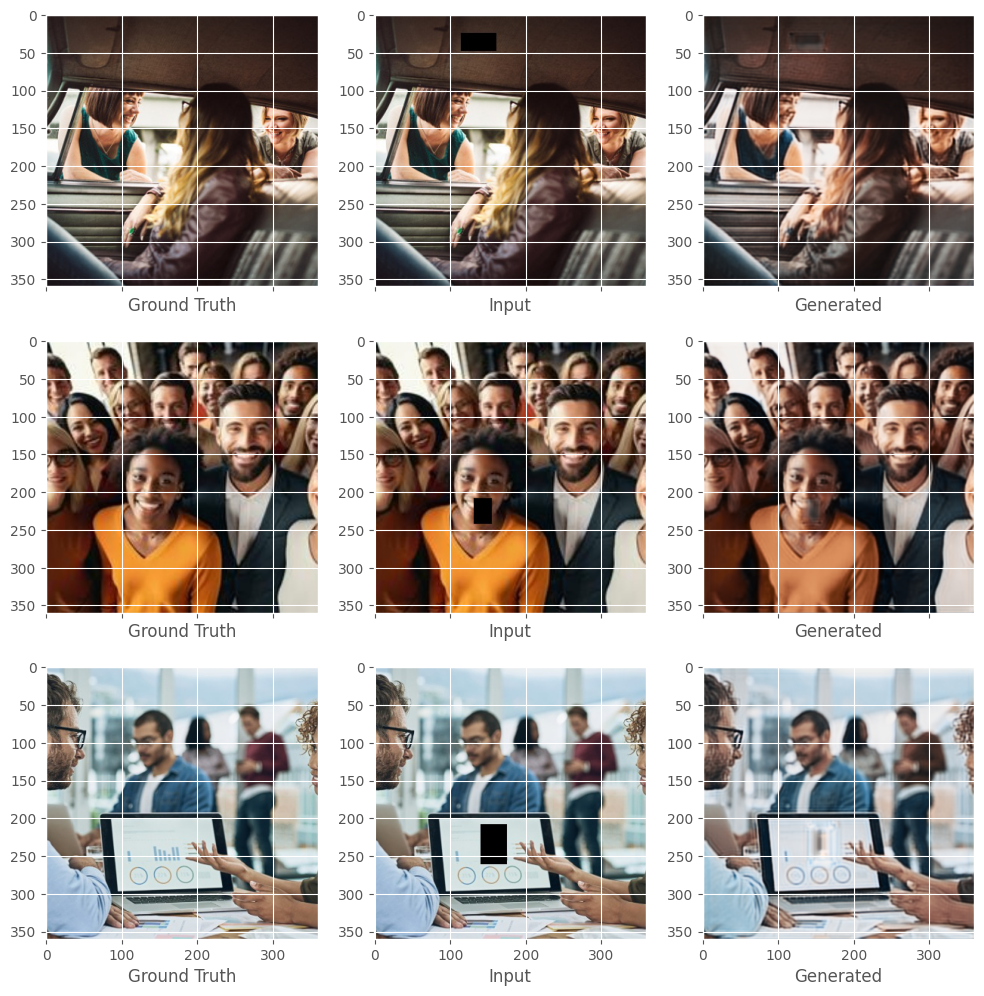

In [22]:
from random import randint

fig, axis = plt.subplots(3, 3, figsize=(12, 12), sharex=True)

for i in range(3):
    X, Y = test_set[randint(0, len(test_set)-1)]
    axis[i][0].imshow(Y.permute(1, 2, 0).numpy())
    axis[i][0].set_xlabel("Ground Truth")
    axis[i][1].imshow(X.permute(1, 2, 0).numpy())
    axis[i][1].set_xlabel("Input")
    with torch.no_grad():
        axis[i][2].imshow(model(X.unsqueeze(0)).squeeze(0).permute(1, 2, 0).numpy())
    axis[i][2].set_xlabel("Generated")
plt.show()